## Practice Case

In [140]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [141]:
df = pd.read_csv('Ritz_Jager_Data.csv')

In [142]:
# Showing the display of the data
df

,hotel_type,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,3/7/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,6/9/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,7/9/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,7/9/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,7/9/2017


In [143]:
# Obtaining data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel_type                      119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal_type       

In [148]:
df.isnull().sum()

hotel_type                             0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               0
babies                                 0
meal_type                              0
country_origin                         0
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16280
company         

In [145]:
#Drop total 0 guest
guest_0 = list(df.loc[df["adults"] + df["children"] + df["babies"]==0].index)
df.drop(df.index[guest_0], inplace=True)

#Customer without cancel booking
no_cancel = df[df['is_canceled'] == 0]

#Customer with cancel booking
cancel = df[df['is_canceled'] == 1]

In [26]:
!pip install pycountry

  Created wheel for pycountry: filename=pycountry-19.8.18-py2.py3-none-any.whl size=10627366 sha256=2491a64ff43aec62599834c40ce8e6bbb2ad961745864a046fb6821ac450a979
  Stored in directory: c:\users\lenovo\appdata\local\pip\cache\wheels\00\77\65\5f318c3c30b046b450a385ecfc690125f8a270cdb0f3f483b4
Successfully built pycountry


## 1. Where do the guests come from?

In [146]:
country_origin = no_cancel[no_cancel['is_repeated_guest'] == 0]['country_origin'].value_counts()
country_origin = pd.DataFrame(country_origin).reset_index()
country_origin.rename(columns={"index": "Country Code", "country_origin":"Total"}, inplace=True)

In [130]:
import pycountry

list_alpha_2 = [i.alpha_2 for i in list(pycountry.countries)]
list_alpha_3 = [i.alpha_3 for i in list(pycountry.countries)]    

def country_flag(df):
    if (len(df['Country Code'])==2 and df['Country Code'] in list_alpha_2):
        return pycountry.countries.get(alpha_2=df['Country Code']).name
    elif (len(df['Country Code'])==3 and df['Country Code'] in list_alpha_3):
        return pycountry.countries.get(alpha_3=df['Country Code']).name
    else:
        return 'Invalid Code'

In [131]:
country_origin['Country'] = country_origin.apply(country_guest, axis = 1)

In [133]:
country_origin = country_origin[['Country Code', 'Country', 'Total']]
country_origin

,Country Code,Country,Total
0,PRT,Portugal,18300
1,GBR,United Kingdom,9563
2,FRA,France,8399
3,ESP,Spain,6300
4,DEU,Germany,6043
...,...,...,...
161,NAM,Namibia,1
162,DMA,Dominica,1
163,ATF,French Southern Territories,1
164,GUY,Guyana,1


In [8]:
# Grouping table by the customer country
guest_from = df.groupby('country_origin')

In [9]:
guest_from.first()

,hotel_type,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
country_origin,,,,,,,,,,,,,,,,,,,,,
ABW,City Hotel,0,45,2016,June,27,27,1,3,3,...,15.0,NaN,0,Transient,157.68,0,2,Check-Out,1/7/2016,27 June 2016
AGO,Resort Hotel,0,0,2015,October,41,7,0,1,3,...,240.0,45.0,0,Transient,0.00,0,0,Check-Out,8/10/2015,7 October 2015
AIA,City Hotel,0,0,2016,July,28,8,2,2,2,...,8.0,NaN,0,Transient,265.00,0,0,Check-Out,12/7/2016,8 July 2016
ALB,Resort Hotel,0,28,2015,July,30,24,2,2,2,...,177.0,233.0,0,Transient,107.00,0,0,Check-Out,28/7/2015,24 July 2015
AND,Resort Hotel,1,111,2016,July,30,23,2,5,2,...,240.0,NaN,0,Transient,180.00,0,0,Canceled,17/4/2016,23 July 2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VGB,City Hotel,1,109,2016,August,32,5,1,2,2,...,9.0,NaN,0,Transient,100.50,0,0,Canceled,28/5/2016,5 August 2016
VNM,Resort Hotel,0,21,2016,July,28,8,0,2,2,...,240.0,NaN,0,Transient,159.00,0,1,Check-Out,10/7/2016,8 July 2016
ZAF,Resort Hotel,0,31,2015,October,41,6,1,5,2,...,250.0,218.0,0,Transient,96.67,1,0,Check-Out,12/10/2015,6 October 2015


## 2. How much do guests pay for a room per night?

In [120]:
#Price per night for every room type 
price = no_cancel.groupby(['hotel_type', 'assigned_room_type'])['adr'].mean()
price

hotel_type    assigned_room_type
City Hotel    A                      97.372345
              B                      94.186973
              C                     101.924196
              D                     116.017687
              E                     138.726230
              F                     171.039269
              G                     177.429208
              K                      71.760511
Resort Hotel  A                      80.075009
              B                     102.288333
              C                     107.201039
              D                      81.263398
              E                     100.977986
              F                     117.310741
              G                     148.970516
              H                     157.962646
              I                      40.558729
Name: adr, dtype: float64

In [10]:
#Sorting data by Resort Hotel only
resort_hotel = df[df['hotel_type'] == 'Resort Hotel']
resort_hotel

,hotel_type,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,NaN,NaN,0,Transient,0.00,0,0,Check-Out,1/7/2015,1 July 2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,NaN,NaN,0,Transient,0.00,0,0,Check-Out,1/7/2015,1 July 2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2/7/2015,1 July 2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2/7/2015,1 July 2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,NaN,0,Transient,98.00,0,1,Check-Out,3/7/2015,1 July 2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40055,Resort Hotel,0,212,2017,August,35,31,2,8,2,...,143.0,NaN,0,Transient,89.75,0,0,Check-Out,10/9/2017,31 August 2017
40056,Resort Hotel,0,169,2017,August,35,30,2,9,2,...,250.0,NaN,0,Transient-Party,202.27,0,1,Check-Out,10/9/2017,30 August 2017
40057,Resort Hotel,0,204,2017,August,35,29,4,10,2,...,250.0,NaN,0,Transient,153.57,0,3,Check-Out,12/9/2017,29 August 2017
40058,Resort Hotel,0,211,2017,August,35,31,4,10,2,...,40.0,NaN,0,Contract,112.80,0,1,Check-Out,14/9/2017,31 August 2017


In [11]:
#Sorting data by City Hotel only
city_hotel = df[df['hotel_type'] == 'City Hotel']
city_hotel

,hotel_type,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
40060,City Hotel,0,6,2015,July,27,1,0,2,1,...,6.0,NaN,0,Transient,0.00,0,0,Check-Out,3/7/2015,1 July 2015
40061,City Hotel,1,88,2015,July,27,1,0,4,2,...,9.0,NaN,0,Transient,76.50,0,1,Canceled,1/7/2015,1 July 2015
40062,City Hotel,1,65,2015,July,27,1,0,4,1,...,9.0,NaN,0,Transient,68.00,0,1,Canceled,30/4/2015,1 July 2015
40063,City Hotel,1,92,2015,July,27,1,2,4,2,...,9.0,NaN,0,Transient,76.50,0,2,Canceled,23/6/2015,1 July 2015
40064,City Hotel,1,100,2015,July,27,2,0,2,2,...,9.0,NaN,0,Transient,76.50,0,1,Canceled,2/4/2015,2 July 2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,394.0,NaN,0,Transient,96.14,0,0,Check-Out,6/9/2017,30 August 2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,9.0,NaN,0,Transient,225.43,0,2,Check-Out,7/9/2017,31 August 2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,9.0,NaN,0,Transient,157.71,0,4,Check-Out,7/9/2017,31 August 2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,89.0,NaN,0,Transient,104.40,0,0,Check-Out,7/9/2017,31 August 2017


In [154]:
no_cancel.groupby(['hotel_type', 'assigned_room_type', 'arrival_date_month'])['adr'].mean()

hotel_type    assigned_room_type  arrival_date_month
City Hotel    A                   April                 101.085583
                                  August                105.961321
                                  December               80.268775
                                  February               79.676157
                                  January                78.234921
                                                           ...    
Resort Hotel  I                   March                  31.917222
                                  May                    34.372000
                                  November               12.642857
                                  October                16.274667
                                  September              59.910000
Name: adr, Length: 203, dtype: float64

In [158]:
price_over_year = no_cancel.groupby(['hotel_type', 'arrival_date_month'])['adr'].mean()
price_over_year

hotel_type    arrival_date_month
City Hotel    April                 111.962267
              August                118.674598
              December               88.401855
              February               86.520062
              January                82.330983
              July                  115.818019
              June                  117.874360
              March                  90.658533
              May                   120.669827
              November               86.946592
              October               102.004672
              September             112.776582
Resort Hotel  April                  75.867816
              August                181.205892
              December               68.410104
              February               54.147478
              January                48.761125
              July                  150.122528
              June                  107.974850
              March                  57.056838
              May          

In [159]:
d2 = no_cancel.groupby(['hotel_type', 'arrival_date_month'])['adr'].mean().to_frame(name = 'price').reset_index()
d2

,hotel_type,arrival_date_month,price
0,City Hotel,April,111.962267
1,City Hotel,August,118.674598
2,City Hotel,December,88.401855
3,City Hotel,February,86.520062
4,City Hotel,January,82.330983
5,City Hotel,July,115.818019
6,City Hotel,June,117.874360
7,City Hotel,March,90.658533
8,City Hotel,May,120.669827
9,City Hotel,November,86.946592


In [176]:
#Months Order
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
d2['arrival_date_month'] = pd.Categorical(d2['arrival_date_month'], 
                     categories=months_order, ordered=True)

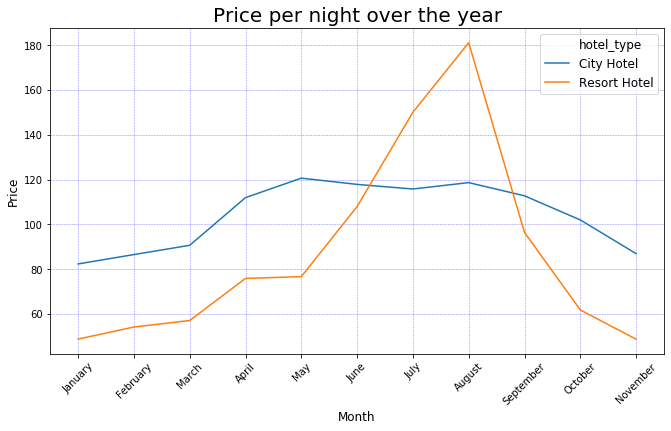

In [189]:
#Plotting line chart for price over the year
plt.figure(figsize=(11, 6))
ax = sns.lineplot(x = "arrival_date_month", y = "price", hue = "hotel_type", 
             data = d2)
plt.title('Price per night over the year', fontdict={'fontsize':20})
plt.xlabel('Month', fontsize=12)
plt.xticks(rotation=45)
plt.ylabel('Price', fontsize=12)
ax.grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
plt.legend(loc="upper right",fontsize="large")

In [192]:
d2

,hotel_type,arrival_date_month,price
0,City Hotel,April,111.962267
1,City Hotel,August,118.674598
2,City Hotel,NaN,88.401855
3,City Hotel,February,86.520062
4,City Hotel,January,82.330983
5,City Hotel,July,115.818019
6,City Hotel,June,117.874360
7,City Hotel,March,90.658533
8,City Hotel,May,120.669827
9,City Hotel,November,86.946592


In [196]:
d2.fillna({'arrival_date_month': 'December'}, inplace=True)
d2

,hotel_type,arrival_date_month,price
0,City Hotel,April,111.962267
1,City Hotel,August,118.674598
2,City Hotel,December,88.401855
3,City Hotel,February,86.520062
4,City Hotel,January,82.330983
5,City Hotel,July,115.818019
6,City Hotel,June,117.874360
7,City Hotel,March,90.658533
8,City Hotel,May,120.669827
9,City Hotel,November,86.946592


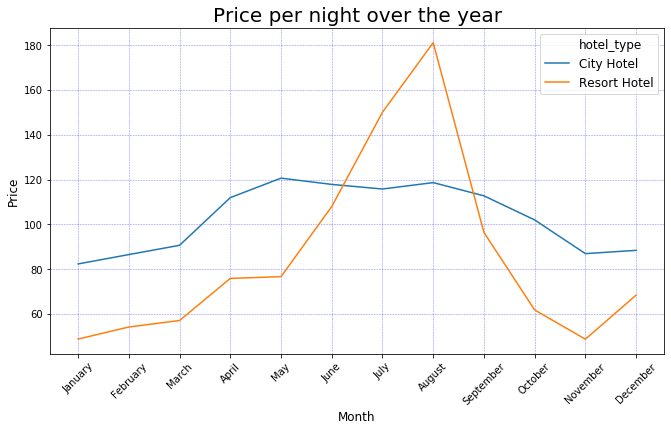

In [197]:
#Plotting line chart for price over the year
plt.figure(figsize=(11, 6))
ax = sns.lineplot(x = "arrival_date_month", y = "price", hue = "hotel_type", 
             data = d2)
plt.title('Price per night over the year', fontdict={'fontsize':20})
plt.xlabel('Month', fontsize=12)
plt.xticks(rotation=45)
plt.ylabel('Price', fontsize=12)
ax.grid(color='b', alpha=0.5, linestyle='dashed', linewidth=0.5)
plt.legend(loc="upper right",fontsize="large")

## 4. Which are the busiest months?

In [55]:
busiest_month = df['arrival_date_month'].value_counts()

Text(0, 0.5, 'Total Arrival')

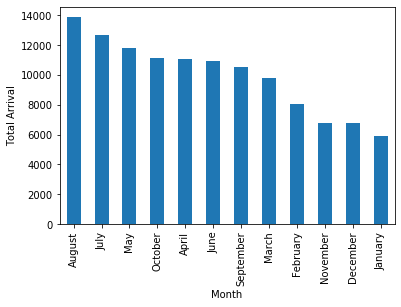

In [58]:

busiest_month.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Total Arrival')

In [17]:
df['arrival_date_month'][df['reservation_status'] == 'Canceled']

8          July
9          July
10         July
27         July
32         July
          ...  
107997      May
108000      May
110280    April
111355     June
111924      May
Name: arrival_date_month, Length: 43017, dtype: object

In [104]:
guest_total=no_cancel[(no_cancel.loc[:,'adults']>0)&(no_cancel.loc[:,'children']>0)]
guest_total

,hotel_type,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,price,total_arrival
13,Resort Hotel,0,18,2015,July,27,1,0,4,2,...,0,Transient,154.77,0,1,Check-Out,5/7/2015,1 July 2015,619.08,NaN
55,Resort Hotel,0,1,2015,July,27,2,0,1,2,...,0,Transient,107.00,1,2,Check-Out,3/7/2015,2 July 2015,107.00,NaN
65,Resort Hotel,0,10,2015,July,27,3,0,2,2,...,0,Transient,153.00,1,0,Check-Out,5/7/2015,3 July 2015,306.00,NaN
98,Resort Hotel,0,101,2015,July,27,3,2,5,2,...,0,Transient,99.30,1,2,Check-Out,10/7/2015,3 July 2015,695.10,NaN
102,Resort Hotel,0,92,2015,July,27,4,2,4,1,...,0,Transient,96.49,0,2,Check-Out,10/7/2015,4 July 2015,578.94,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119270,City Hotel,0,0,2017,August,35,29,0,3,2,...,0,Transient,135.00,0,2,Check-Out,1/9/2017,29 August 2017,405.00,NaN
119287,City Hotel,0,167,2017,August,35,27,2,4,2,...,0,Transient,177.75,0,0,Check-Out,2/9/2017,27 August 2017,1066.50,NaN
119293,City Hotel,0,243,2017,August,35,30,0,3,2,...,0,Transient,189.00,0,3,Check-Out,2/9/2017,30 August 2017,567.00,NaN
119318,City Hotel,0,160,2017,August,35,29,0,5,2,...,0,Transient,153.90,0,0,Check-Out,3/9/2017,29 August 2017,769.50,NaN


In [105]:
#Calculating average people stay at hotels on weekend nights
guest_total['stays_in_weekend_nights'].mean()

1.0148356807511738

In [107]:
#Calculating average people stay at hotels on week nights
guest_total['stays_in_week_nights'].mean()

2.5968075117370892

## 6. Bookings by market segment

In [51]:
booking = df[['market_segment', 'customer_type']]
segmentation = booking.groupby('market_segment').count().sort_values(by='customer_type', ascending=False)
segmentation

,customer_type
market_segment,
Online TA,56477
Offline TA/TO,24219
Groups,19811
Direct,12606
Corporate,5295
Complementary,743
Aviation,237
Undefined,2


Text(0, 0.5, 'Total Reservetion')

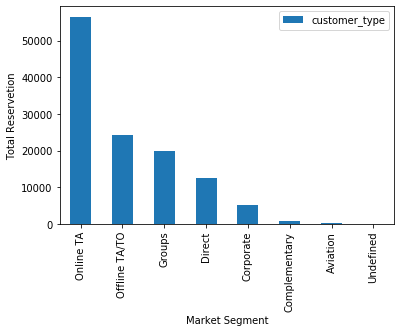

In [53]:
segmentation.plot(kind='bar')
plt.xlabel('Market Segment')
plt.ylabel('Total Reservetion')

## 7. How many bookings were cancelled?

In [20]:
df[df['is_canceled'] == 1]['hotel_type'].count()

44224

In [21]:
df[df['is_canceled'] == 0]['arrival_date_month'].max()

'September'

## 8. Which month has the highest number of cancellations?

In [59]:
highest_canceled=df[df['is_canceled'] == 0]['arrival_date_month'].value_counts()

In [146]:
df[df['is_canceled'] == 0]['arrival_date_month'].value_counts().max()

8638

Text(0, 0.5, 'Total Cancellations')

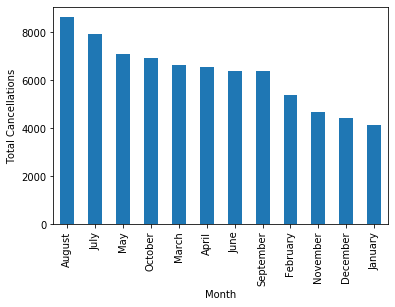

In [60]:
highest_canceled.plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Total Cancellations')